In [3]:
print("""
@Description: Building input pipelines in PyTorch
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-05 12:38:50
""")


@Description: Building input pipelines in PyTorch
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-05 12:38:50



## Building input pipelines in PyTorch

In [4]:
import torch

In [5]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [6]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [7]:
data_loader = DataLoader(t, batch_size=3, drop_last=True)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Combining two tensors into a joint dataset

In [8]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [9]:
from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [10]:
joint_dataset = JointDataset(t_x, t_y)
for example in joint_dataset:
    print('x:', example[0], 'y:', example[1])

x: tensor([0.7576, 0.2793, 0.4031]) y: tensor(0)
x: tensor([0.7347, 0.0293, 0.7999]) y: tensor(1)
x: tensor([0.3971, 0.7544, 0.5695]) y: tensor(2)
x: tensor([0.4388, 0.6387, 0.5247]) y: tensor(3)


### Shuffle, batch, and repeat

In [11]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

In [12]:
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0], '\n y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
 y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y: tensor([1, 3])


In [13]:
for epoch in range(2):
    print(f'epoch {epoch + 1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:\n', batch[0], '\n y:', batch[1])

epoch 1
batch 1: x:
 tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([0, 2])
batch 2: x:
 tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y: tensor([1, 3])
epoch 2
batch 1: x:
 tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([3, 2])
batch 2: x:
 tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
 y: tensor([0, 1])


### Creating a dataset from files on your local storage disk

In [14]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
file_list

['cat_dog_images\\cat-01.jpg',
 'cat_dog_images\\cat-02.jpg',
 'cat_dog_images\\cat-03.jpg',
 'cat_dog_images\\dog-01.jpg',
 'cat_dog_images\\dog-02.jpg',
 'cat_dog_images\\dog-03.jpg']

In [15]:
imgdir_path

WindowsPath('cat_dog_images')

Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


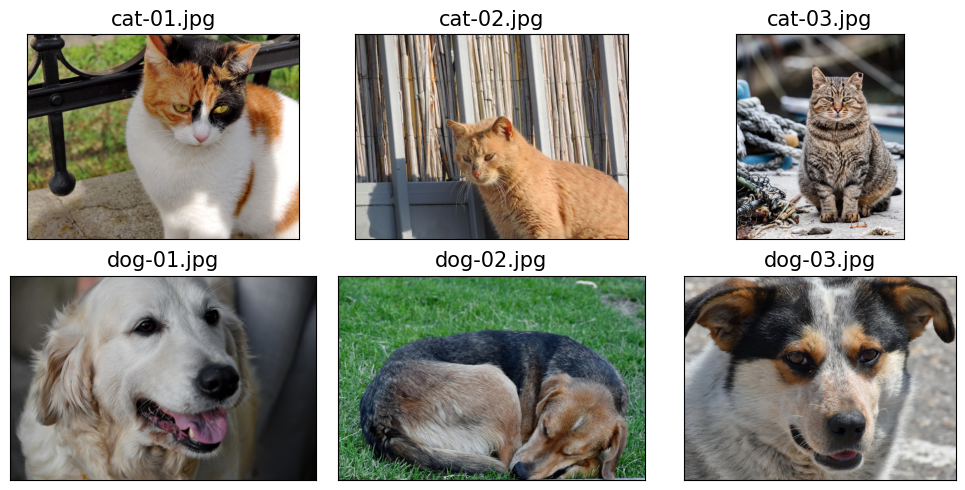

In [16]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [17]:
labels = [1 if 'dog' in os.path.basename(file) else 0 
          for file in file_list]
labels

[0, 0, 0, 1, 1, 1]

In [18]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels
        
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label
    
    def __len__(self):
        return len(self.labels)

In [19]:
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images\cat-01.jpg 0
cat_dog_images\cat-02.jpg 0
cat_dog_images\cat-03.jpg 0
cat_dog_images\dog-01.jpg 1
cat_dog_images\dog-02.jpg 1
cat_dog_images\dog-03.jpg 1


In [20]:
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width), antialias=True)
])

In [21]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
        
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)
    

image_dataset = ImageDataset(file_list, labels, transform)

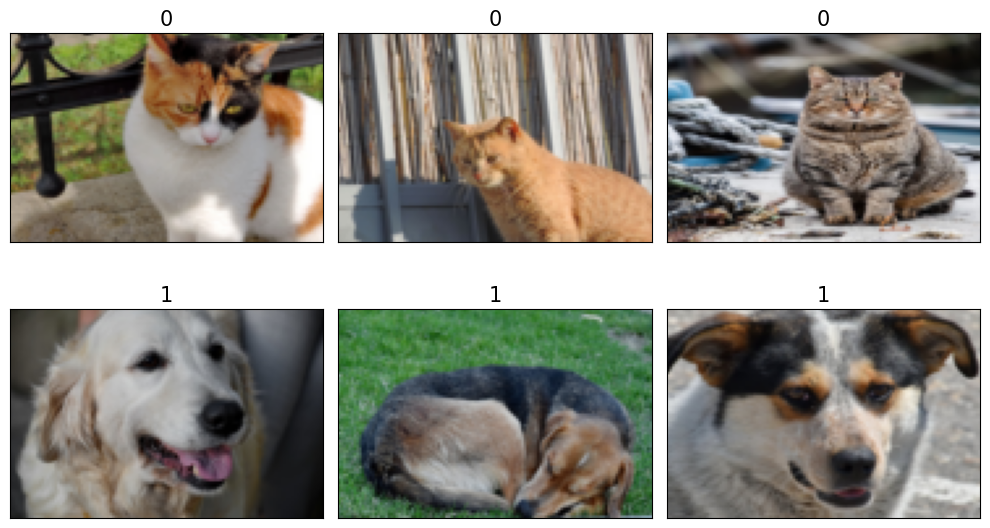

In [22]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    # 因为imshow接收的是[0, 255]的整数，这里转化一下
    ax.imshow((255*example[0].numpy()).astype(np.uint8).transpose(1, 2, 0))
    ax.set_title(example[1], size=15)
plt.tight_layout()
plt.show()

### Fetching available datasets from the torchvision.datasets library

In [23]:
import torchvision
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(
    image_path, split='train', target_type='attr', download=False
)

In [24]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [25]:
example = next(iter(celeba_dataset))

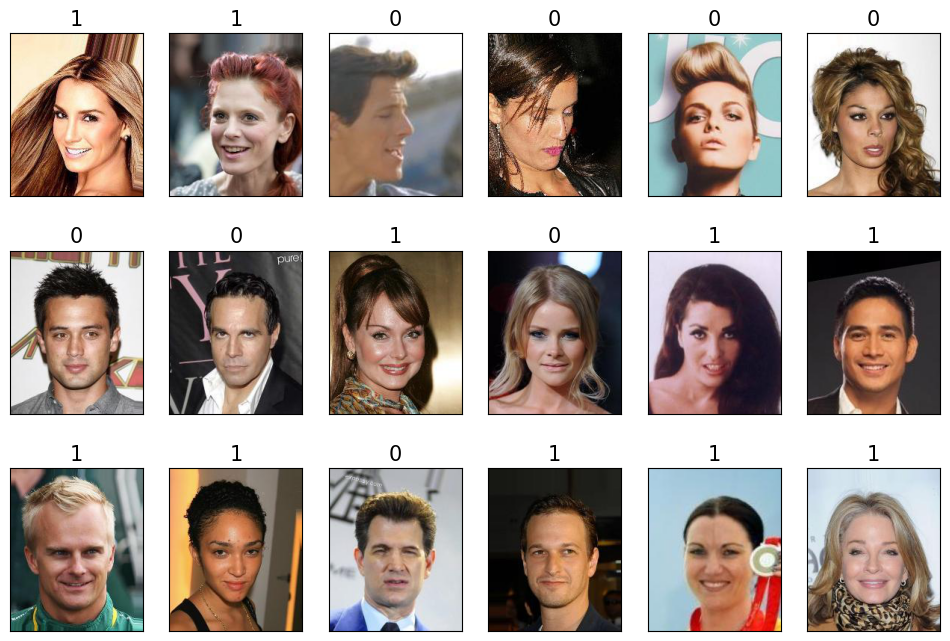

In [26]:
from itertools import islice
fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset),18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)
plt.show()

In [27]:
mnist_dataset = torchvision.datasets.MNIST(image_path,
                                           'train', download=True)

In [28]:
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

In [29]:
example = next(iter(mnist_dataset))
print(example)

(<PIL.Image.Image image mode=L size=28x28 at 0x23200C4B700>, 5)


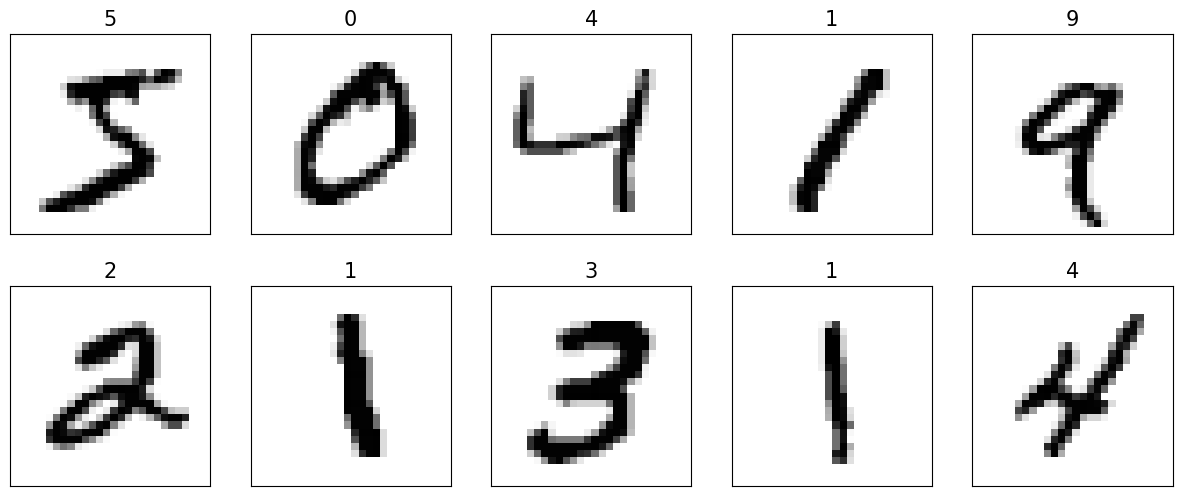

In [30]:
from itertools import islice
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)